In [3]:
# TODO: Load the dataset
from tensorflow.keras.datasets import fashion_mnist

#TODO: load dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

X_train.shape

4422102/4422102 [==============================] - 0s 0us/step


(60000, 28, 28)

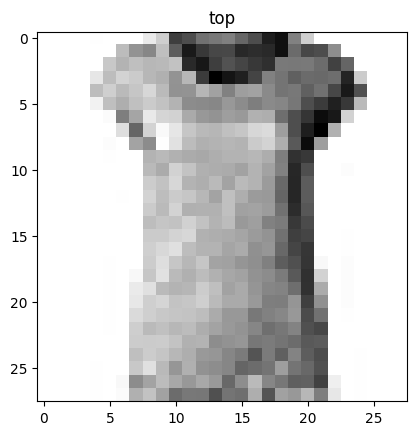

In [4]:
# TODO: Explore the data, display some input images
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

label_class = ['top', 'trouser', 'pullover', 'dress', 'coat', 'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']

# np.random.seed(0)
idx = np.random.randint(X_train.shape[0])

plt.imshow(X_train[idx], cmap='gray_r')
plt.title(label_class[y_train[idx]])
plt.show()

In [5]:
# TODO: Make the data preparation
from tensorflow.keras.utils import to_categorical

y_train_cat = to_categorical(y_train, num_classes = 10)
y_test_cat = to_categorical(y_test, num_classes = 10)

X_train_norm = X_train/255
X_test_norm = X_test/255

# TODO: reshape the image data (2D array) into input 1D array for a neural network
X_train_norm = X_train_norm.reshape(X_train_norm.shape[0], X_train_norm.shape[1], X_train_norm.shape[2], 1)
X_test_norm = X_test_norm.reshape(X_test_norm.shape[0], X_test_norm.shape[1], X_test_norm.shape[2], 1)
X_train_norm.shape

(60000, 28, 28, 1)

In [6]:
# TODO: Build your model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import MaxPooling2D, Conv2D, Flatten, Dense


def lenet5():
    
    model = Sequential()

    # Layer C1
    model.add(Conv2D(filters=6, name='C1', kernel_size=(3, 3), activation='relu', input_shape=(28,28,1)))
    # Layer S2
    model.add(MaxPooling2D(pool_size=(2, 2), name='S2'))
    # Layer C3
    model.add(Conv2D(filters=16, name='C3', kernel_size=(3, 3), activation='relu'))
    # Layer S4
    model.add(MaxPooling2D(pool_size=(2, 2), name='S4'))
    # Before going into layer C5, we flatten our units
    model.add(Flatten())
    # Layer C5
    model.add(Dense(120, activation='relu', name='c5'))
    # Layer F6
    model.add(Dense(84, activation='relu', name='c6'))
    # Output layer
    model.add(Dense(units=10, activation = 'softmax'))
    
    return model

lenet5().summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 C1 (Conv2D)                 (None, 26, 26, 6)         60        
                                                                 
 S2 (MaxPooling2D)           (None, 13, 13, 6)         0         
                                                                 
 C3 (Conv2D)                 (None, 11, 11, 16)        880       
                                                                 
 S4 (MaxPooling2D)           (None, 5, 5, 16)          0         
                                                                 
 flatten (Flatten)           (None, 400)               0         
                                                                 
 c5 (Dense)                  (None, 120)               48120     
                                                                 
 c6 (Dense)                  (None, 84)                1

In [7]:
# TODO: Compile and fit your model
import os

# os.environ['KMP_DUPLICATE_LIB_OK']='True' #https://stackoverflow.com/questions/53014306/error-15-initializing-libiomp5-dylib-but-found-libiomp5-dylib-already-initial


from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.callbacks import TensorBoard

model = lenet5()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Define now our callbacks
# callbacks = [EarlyStopping(monitor='val_loss', patience=10), TensorBoard(log_dir='./keras-logs', histogram_freq=0, write_graph=True, write_images=True)]
callbacks = [EarlyStopping(monitor='val_loss', patience=10)]

# Finally fit the model
model.fit(x=X_train_norm, y=y_train_cat, validation_data=(X_test_norm, y_test_cat), epochs=50, batch_size=2048, callbacks=callbacks)

Epoch 1/50
30/30 [==============================] - 28s 882ms/step - loss: 1.7091 - accuracy: 0.5469 - val_loss: 0.9454 - val_accuracy: 0.6724
Epoch 2/50
30/30 [==============================] - 24s 773ms/step - loss: 0.7747 - accuracy: 0.7167 - val_loss: 0.6664 - val_accuracy: 0.7558
Epoch 3/50
30/30 [==============================] - 20s 685ms/step - loss: 0.5964 - accuracy: 0.7759 - val_loss: 0.5727 - val_accuracy: 0.7819
Epoch 4/50
30/30 [==============================] - 20s 662ms/step - loss: 0.5282 - accuracy: 0.8023 - val_loss: 0.5192 - val_accuracy: 0.8054
Epoch 5/50
30/30 [==============================] - 19s 624ms/step - loss: 0.4904 - accuracy: 0.8194 - val_loss: 0.4954 - val_accuracy: 0.8210
Epoch 6/50
30/30 [==============================] - 20s 667ms/step - loss: 0.4555 - accuracy: 0.8379 - val_loss: 0.4620 - val_accuracy: 0.8371
Epoch 7/50
30/30 [==============================] - 18s 620ms/step - loss: 0.4329 - accuracy: 0.8471 - val_loss: 0.4543 - val_accuracy: 0.8336

In [8]:
# TODO: Compute the accuracy of your model
from sklearn.metrics import accuracy_score

batch_size = 1024
y_pred_train = to_categorical(model.predict(X_train_norm, batch_size=batch_size).argmax(axis=1), num_classes=10)
y_pred_test = to_categorical(model.predict(X_test_norm, batch_size=batch_size).argmax(axis=1), num_classes=10)

print('accuracy on train with NN:', accuracy_score(y_pred_train, y_train_cat))
print('accuracy on test with NN:', accuracy_score(y_pred_test, y_test_cat))

10/10 [==============================] - 1s 108ms/step
accuracy on train with NN: 0.9093166666666667
accuracy on test with NN: 0.8929


In [9]:
# TODO: Instantiate an ImageDataGenerator object
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(horizontal_flip=True)

In [12]:
# TODO: train your model
batch_size = 1024
model.fit_generator(datagen.flow(X_train_norm, y_train_cat, batch_size=batch_size),
                    validation_data=(X_test_norm, y_test_cat), callbacks=callbacks,
                    steps_per_epoch=len(X_train_norm) / batch_size, epochs=50)

<ipython-input-12-0542d4a0f97d>:3: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  model.fit_generator(datagen.flow(X_train_norm, y_train_cat, batch_size=batch_size),


Epoch 1/50
58/58 [==============================] - 34s 564ms/step - loss: 0.2597 - accuracy: 0.9055 - val_loss: 0.2932 - val_accuracy: 0.8950
Epoch 2/50
58/58 [==============================] - 22s 371ms/step - loss: 0.2561 - accuracy: 0.9077 - val_loss: 0.2912 - val_accuracy: 0.8952
Epoch 3/50
58/58 [==============================] - 22s 371ms/step - loss: 0.2533 - accuracy: 0.9082 - val_loss: 0.2972 - val_accuracy: 0.8897
Epoch 4/50
58/58 [==============================] - 23s 385ms/step - loss: 0.2499 - accuracy: 0.9092 - val_loss: 0.2955 - val_accuracy: 0.8952
Epoch 5/50
58/58 [==============================] - 25s 420ms/step - loss: 0.2514 - accuracy: 0.9081 - val_loss: 0.2910 - val_accuracy: 0.8953
Epoch 6/50
58/58 [==============================] - 22s 373ms/step - loss: 0.2482 - accuracy: 0.9097 - val_loss: 0.2889 - val_accuracy: 0.8967
Epoch 7/50
58/58 [==============================] - 22s 375ms/step - loss: 0.2481 - accuracy: 0.9094 - val_loss: 0.2997 - val_accuracy: 0.8891

In [13]:
# TODO: Compute the accuracy of your model
from sklearn.metrics import accuracy_score

batch_size=1024
y_pred_train = to_categorical(model.predict(X_train_norm, batch_size=batch_size).argmax(axis=1), num_classes=10)
y_pred_test = to_categorical(model.predict(X_test_norm, batch_size=batch_size).argmax(axis=1), num_classes=10)

print('accuracy on train with CNN:', accuracy_score(y_pred_train, y_train_cat))
print('accuracy on test with CNN:', accuracy_score(y_pred_test, y_test_cat))

10/10 [==============================] - 1s 106ms/step
accuracy on train with CNN: 0.92435
accuracy on test with CNN: 0.9031
